In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv")
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [4]:
df.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [5]:
def clean_col(x):
    x = x.replace(" ", "_")
    x = x.lower()
    return x
    
df.columns = map(clean_col,df.columns)
df.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [6]:
df["effective_to_date"] = pd.to_datetime(df["effective_to_date"])
#df["Effective To Date"]as_type("date")

In [7]:
df_num = df.select_dtypes("number")
df_num.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


In [8]:
continuos = []
discrete = []
categorical = []
def cont_or_disc(x, df):
    
    if df[x].dtype == "object":
        categorical.append(x)
    elif len(df[x].unique()) > 40:
        continuos.append(x)
    else:
        discrete.append(x)
        


In [9]:
for col in df.columns:
    cont_or_disc(col, df)

print(continuos)
print(discrete)
print(categorical)

['customer_lifetime_value', 'effective_to_date', 'income', 'monthly_premium_auto', 'months_since_policy_inception', 'total_claim_amount']
['months_since_last_claim', 'number_of_open_complaints', 'number_of_policies']
['customer', 'state', 'response', 'coverage', 'education', 'employmentstatus', 'gender', 'location_code', 'marital_status', 'policy_type', 'policy', 'renew_offer_type', 'sales_channel', 'vehicle_class', 'vehicle_size']


In [10]:
df_cat = df.select_dtypes("object")
df_cat.head()

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [11]:
def clean_cat(x):
    if x == " ":
        return 'other'
    else:
        return x
for col in df_cat:
   df[col].apply(clean_cat)
print(continuos)
print(discrete)
print(categorical)

['customer_lifetime_value', 'effective_to_date', 'income', 'monthly_premium_auto', 'months_since_policy_inception', 'total_claim_amount']
['months_since_last_claim', 'number_of_open_complaints', 'number_of_policies']
['customer', 'state', 'response', 'coverage', 'education', 'employmentstatus', 'gender', 'location_code', 'marital_status', 'policy_type', 'policy', 'renew_offer_type', 'sales_channel', 'vehicle_class', 'vehicle_size']


<h1>4.02<h/1>



In [12]:
for col in df_cat:
   cont_or_disc(col, df)

In [13]:
df_num.corr()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer_lifetime_value,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451
income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254
monthly_premium_auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017
months_since_last_claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563
months_since_policy_inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335
number_of_open_complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241
number_of_policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354
total_claim_amount,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000


In [14]:
discrete

['months_since_last_claim', 'number_of_open_complaints', 'number_of_policies']

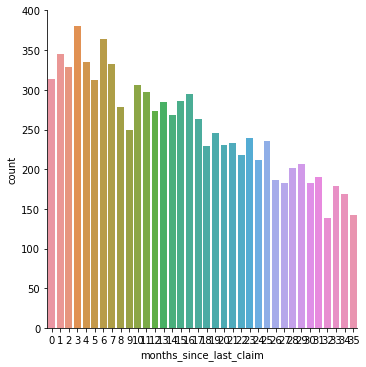

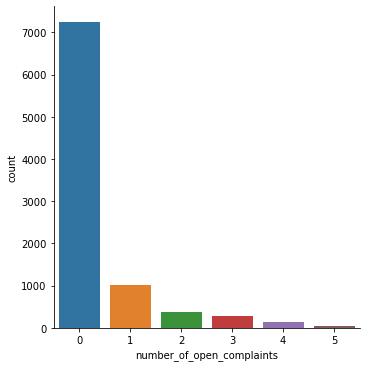

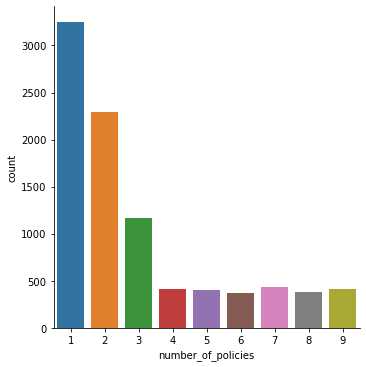

In [15]:
for col in discrete:
    sns.catplot(x = col, kind = "count", data = df)
    plt.show

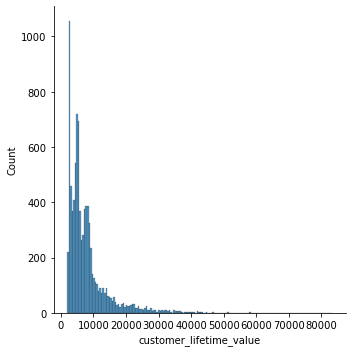

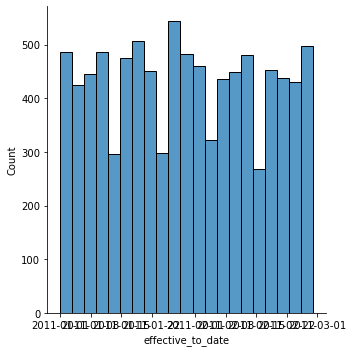

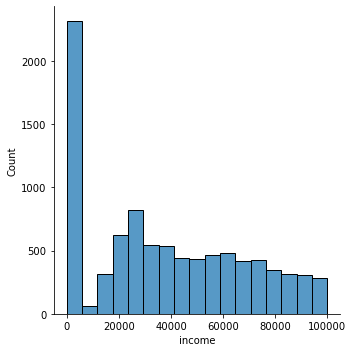

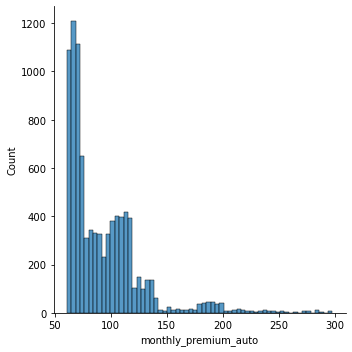

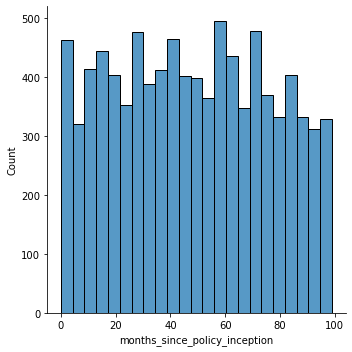

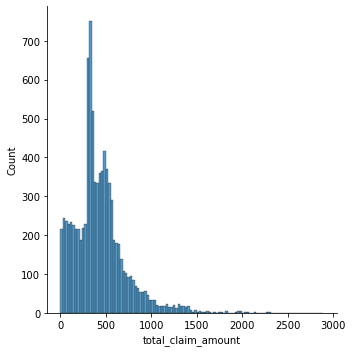

In [16]:
for col in continuos:
    sns.displot(df[col])
    plt.show

customer_lifetime_value


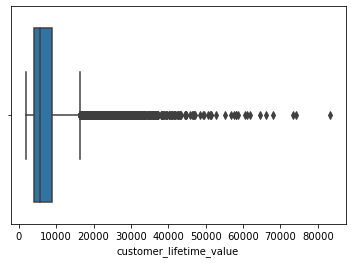

income


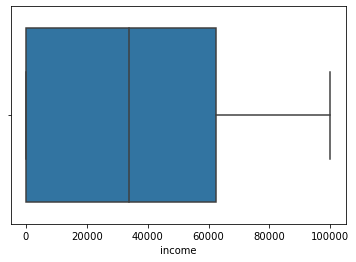

monthly_premium_auto


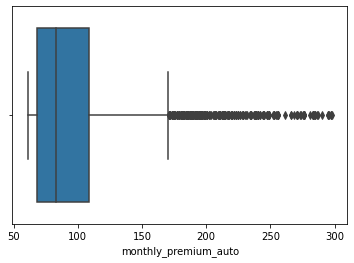

months_since_last_claim


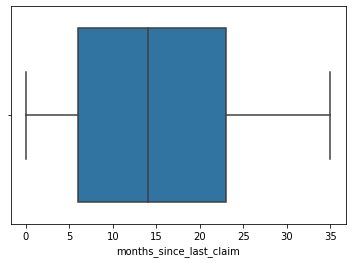

months_since_policy_inception


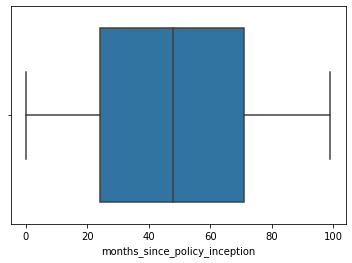

number_of_open_complaints


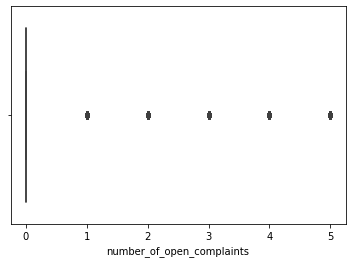

number_of_policies


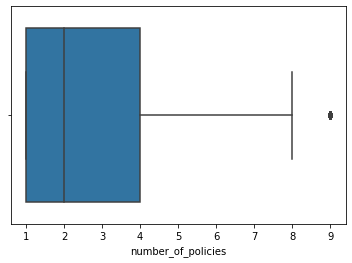

total_claim_amount


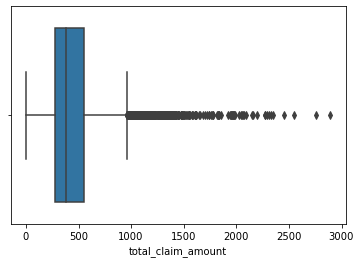

In [23]:
for col in df_num.columns:
    print(col)
    sns.boxplot(x = df_num[col])
    plt.show()

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer                       9134 non-null   object        
 1   state                          9134 non-null   object        
 2   customer_lifetime_value        9134 non-null   float64       
 3   response                       9134 non-null   object        
 4   coverage                       9134 non-null   object        
 5   education                      9134 non-null   object        
 6   effective_to_date              9134 non-null   datetime64[ns]
 7   employmentstatus               9134 non-null   object        
 8   gender                         9134 non-null   object        
 9   income                         9134 non-null   int64         
 10  location_code                  9134 non-null   object        
 11  marital_status   

<h1>Lab 4.03<h/1>

In [ ]:
df.head()

In [25]:
df_cat = df.select_dtypes("object")
df_cat.head()

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [26]:
df_cat = df_cat.drop("customer", axis = 1)

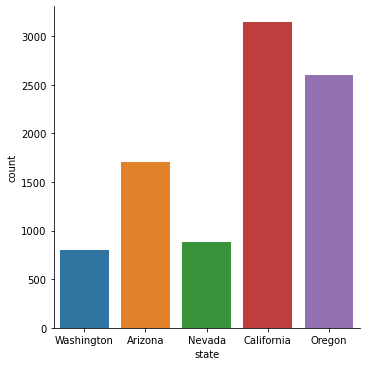

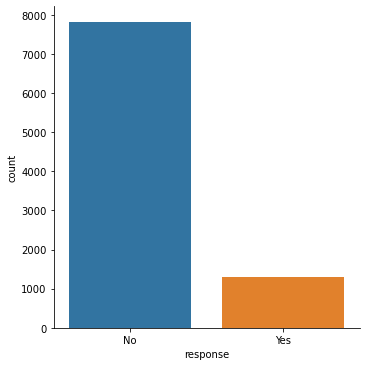

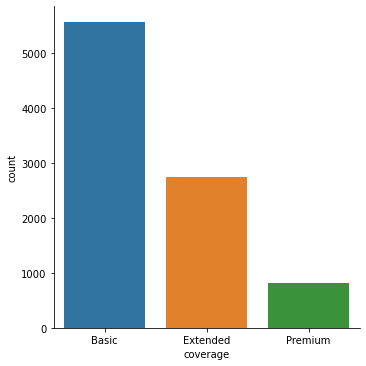

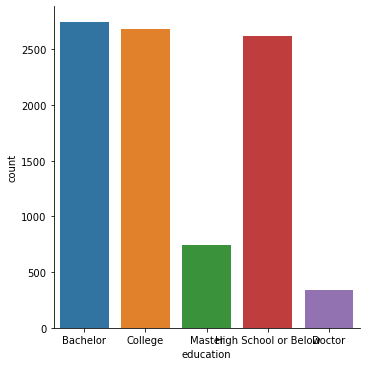

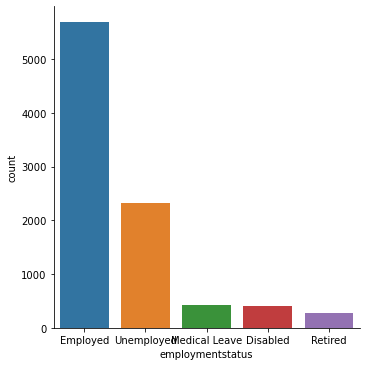

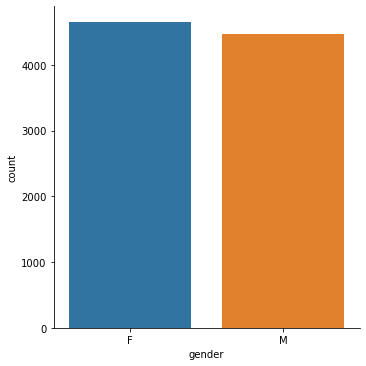

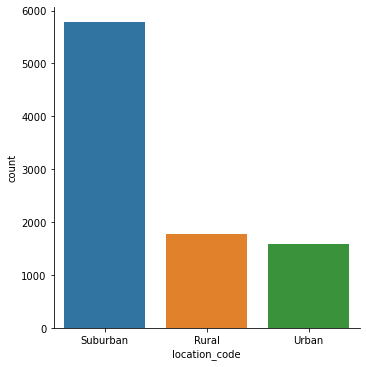

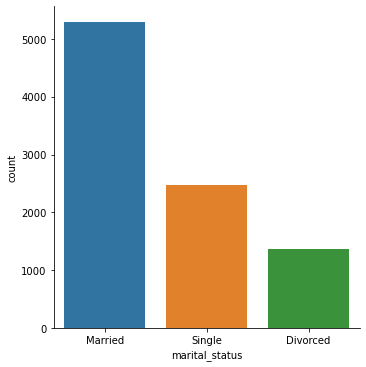

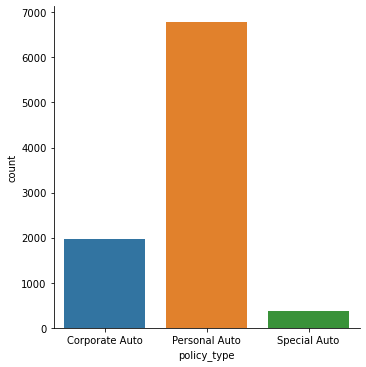

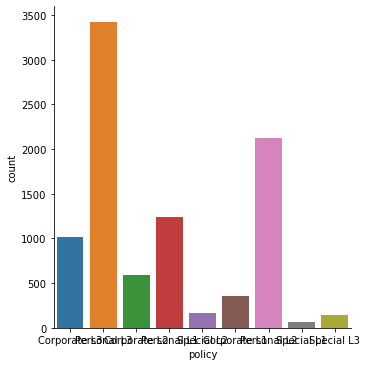

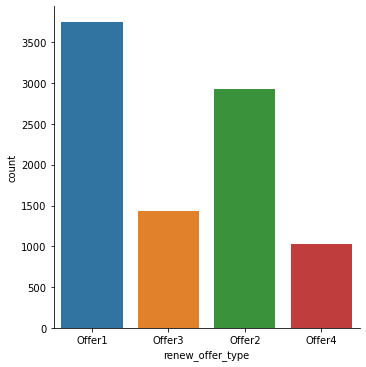

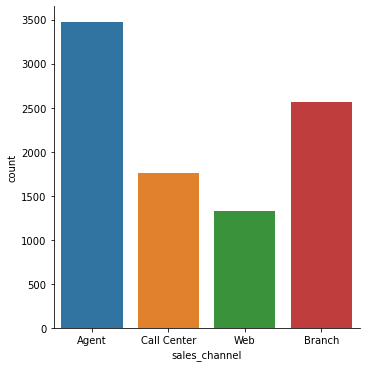

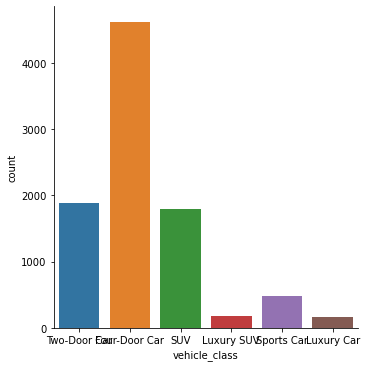

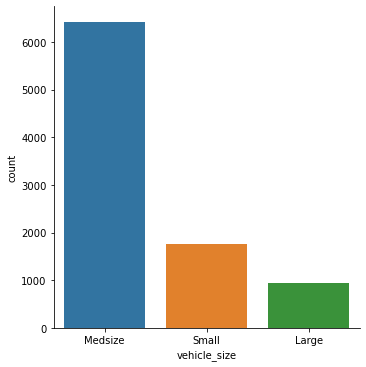

In [27]:
for col in df_cat:
    sns.catplot(x = col, kind = "count", data = df)
    plt.show

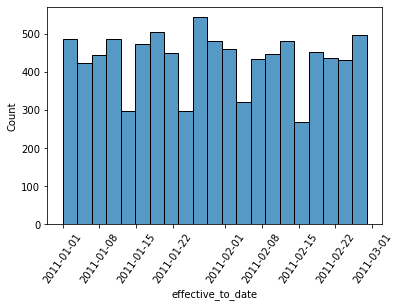

In [31]:
sns.histplot(df["effective_to_date"])
plt.xticks(rotation=55)
plt.show()

<h1>Lab 4.04<h/1>

In [32]:
data = df.copy()

def remove_outliers(df):
    if df.dtypes in ('Int64','float64'):
        #IQR method to remove outliers
        Q1=numerical.quantile(0.25)
        Q3=numerical.quantile(0.75)
        IQR=Q3-Q1
        low_bound=Q1 - 1.5 * IQR
        upper_bound=Q3 + 1.5 * IQR
        df = df[~((df < low_bound) |(numerical > upper_bound)).any(axis=1)]             
        #print(low_bound,upper_bound)
    return df

In [36]:
continuos = pd.DataFrame(continuos).apply(remove_outliers)

<ipython-input-32-78bac560d868>:4: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  if df.dtypes in ('Int64','float64'):


In [44]:
from sklearn.preprocessing import Normalizer
transformer = Normalizer().fit(df[list(continuos[0])])
continuos = transformer.transform(continuos)

<h1>Lab 4.05<h/1>

In this final lab, we will model our data. Import sklearn train_test_split and separate the data.
Try a simple linear regression with all the data to see whether we are getting good results.
Great! Now define a function that takes a list of models and train (and tests) them so we can try a lot of them without repeating code.
Use the function to check LinearRegressor and KNeighborsRegressor.
You can check also the MLPRegressor for this task!
Check and discuss the results.

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv("files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv")
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [47]:
df_num = df.select_dtypes("number")
df_num.head()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


In [48]:
df_cat = df.select_dtypes("object")
df_cat = df_cat.drop(["Customer", "Effective To Date" ], axis = 1)
df_cat_dum = pd.get_dummies(df_cat, drop_first = True)
df_cat_dum.head()

,State_California,State_Nevada,State_Oregon,State_Washington,Response_Yes,Coverage_Extended,Coverage_Premium,Education_College,Education_Doctor,Education_High School or Below,...,Sales Channel_Branch,Sales Channel_Call Center,Sales Channel_Web,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Medsize,Vehicle Size_Small
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,1,0
3,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [53]:
from sklearn.model_selection import train_test_split

X = pd.concat([df_num.drop("Total Claim Amount", axis = 1), df_cat_dum], axis = 1)
y = df["Total Claim Amount"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [80]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor

In [98]:
def Regression_input(models):
    for model in models:
        print (model)
        mod = model().fit(X_train, y_train)
        predictions = mod.predict(X_test)
        print("mean absolute error: ", mean_absolute_error(y_test,predictions))
        print("root mean squared error: ", np.sqrt(mean_squared_error(y_test,predictions)))
        print("R2: ", r2_score(y_test,predictions))
        print()
 

In [99]:
models = [LinearRegression, KNeighborsRegressor, MLPRegressor ]

In [100]:
Regression_input(models)

<class 'sklearn.linear_model._base.LinearRegression'>
mean absolute error:  94.62597341731225
root mean squared error:  138.05551056061543
R2:  0.7642022023007234

<class 'sklearn.neighbors._regression.KNeighborsRegressor'>
mean absolute error:  172.39755550434495
root mean squared error:  247.0410860513098
R2:  0.24495883941176955

<class 'sklearn.neural_network._multilayer_perceptron.MLPRegressor'>
mean absolute error:  146.2303662388744
root mean squared error:  198.99710807301264
R2:  0.5100793086701112



<h1>Lab 4.06<h/1>

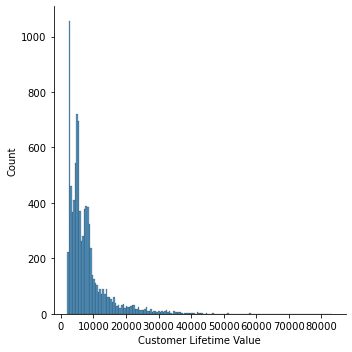

Skewness:  3.032280259929985


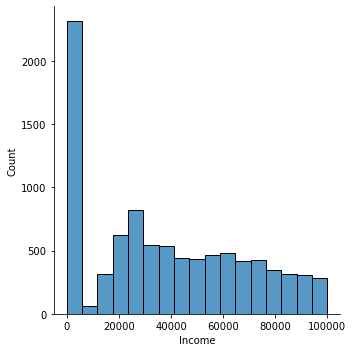

Skewness:  0.28688727581189166


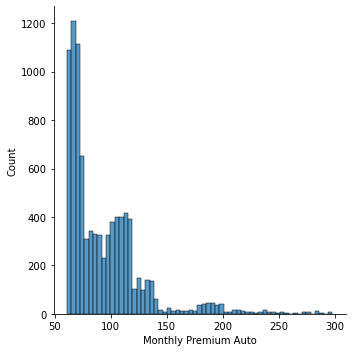

Skewness:  2.1235464499475345


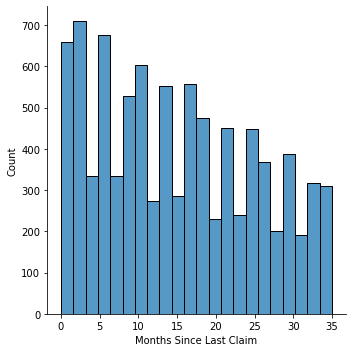

Skewness:  0.2785863118107981


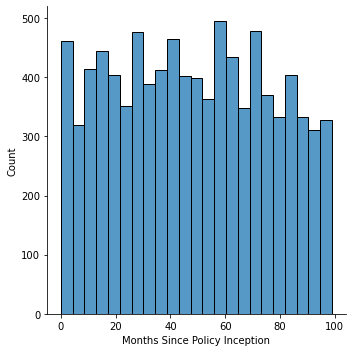

Skewness:  0.040164961597799524


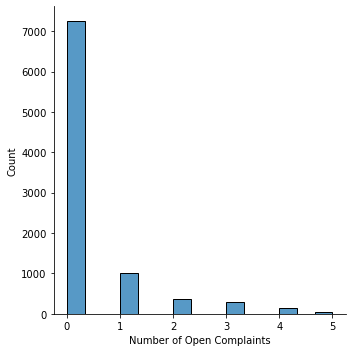

Skewness:  2.783263052399567


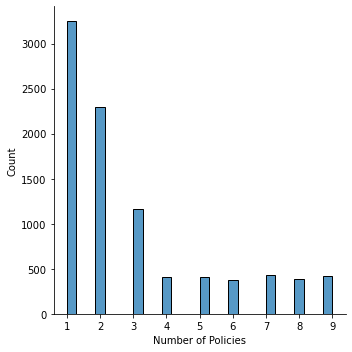

Skewness:  1.2533327352739663


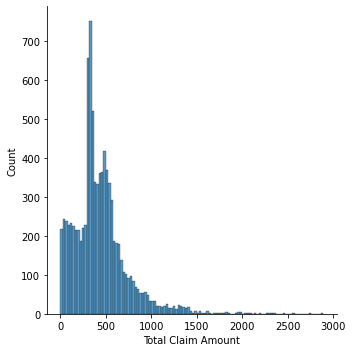

Skewness:  1.7149658097209557


In [101]:
for col in df_num.columns: # Displaying Numerical Columns
    sns.displot(df_num[col])
    Skewnes = df_num[col].skew()
    plt.show()
    print("Skewness: ", Skewnes ) #Skewness shows how much each feature varies from the normal distribution

In [105]:
def log_transformer(x):
    if np.isfinite(x): 
        return np.log(x)
    else:
        return np.NAN 

In [110]:
df_log = df_num.applymap(log_transformer)

<ipython-input-105-d4861cd5d731>:3: RuntimeWarning: divide by zero encountered in log
  return np.log(x)


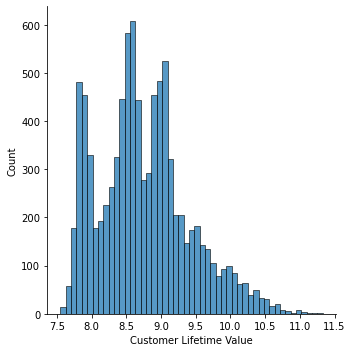

Skewness:  0.5759407149025203


ValueError: autodetected range of [-inf, 11.512735446917942] is not finite

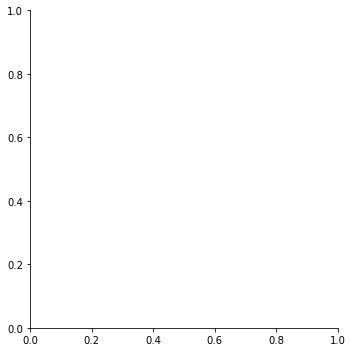

In [111]:
for col in df_log.columns: # Displaying Numerical Columns
    sns.displot(df_log[col])
    Skewnes = df_log[col].skew()
    plt.show()
    print("Skewness: ", Skewnes ) #Skewness shows how much each feature varies from the normal distribution